# Analyse pre-exploratoire et exploratoire

## Charger le training set

In [2]:
import pandas as pd
import numpy as np 
from ydata_profiling import ProfileReport

/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv("../data/raw/train.csv")

In [4]:
df.shape

(891, 12)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
profile = ProfileReport(df[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked", "SibSp", "Parch"]], title="Profiling Report")

In [7]:
profile.to_file("your_report.html")

/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)
Summarize dataset:   0%|          | 0/13 [00:00<?, ?it/s, Describe variable:Age]

Summarize dataset:  67%|██████▋   | 10/15 [00:04<00:02,  1.85it/s, Calculate auto correlation]/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'Function <code object pandas_auto_compute at 0x582a640, file "/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/ydata_profiling/model/pandas/correlations_pandas.py", line 164>')
  warnings.warn(
Summarize dataset:  85%|████████▌ | 29/34 [00:17<00:01,  3.94it/s, Missing diagram heatmap]   /home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Forma

<Axes: >

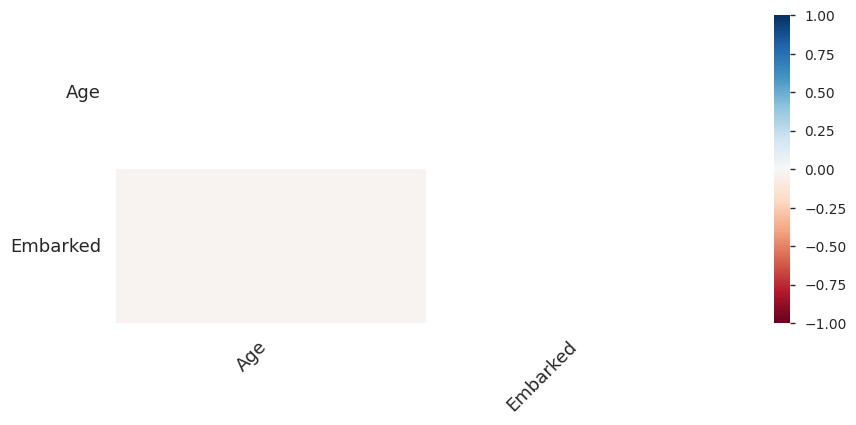

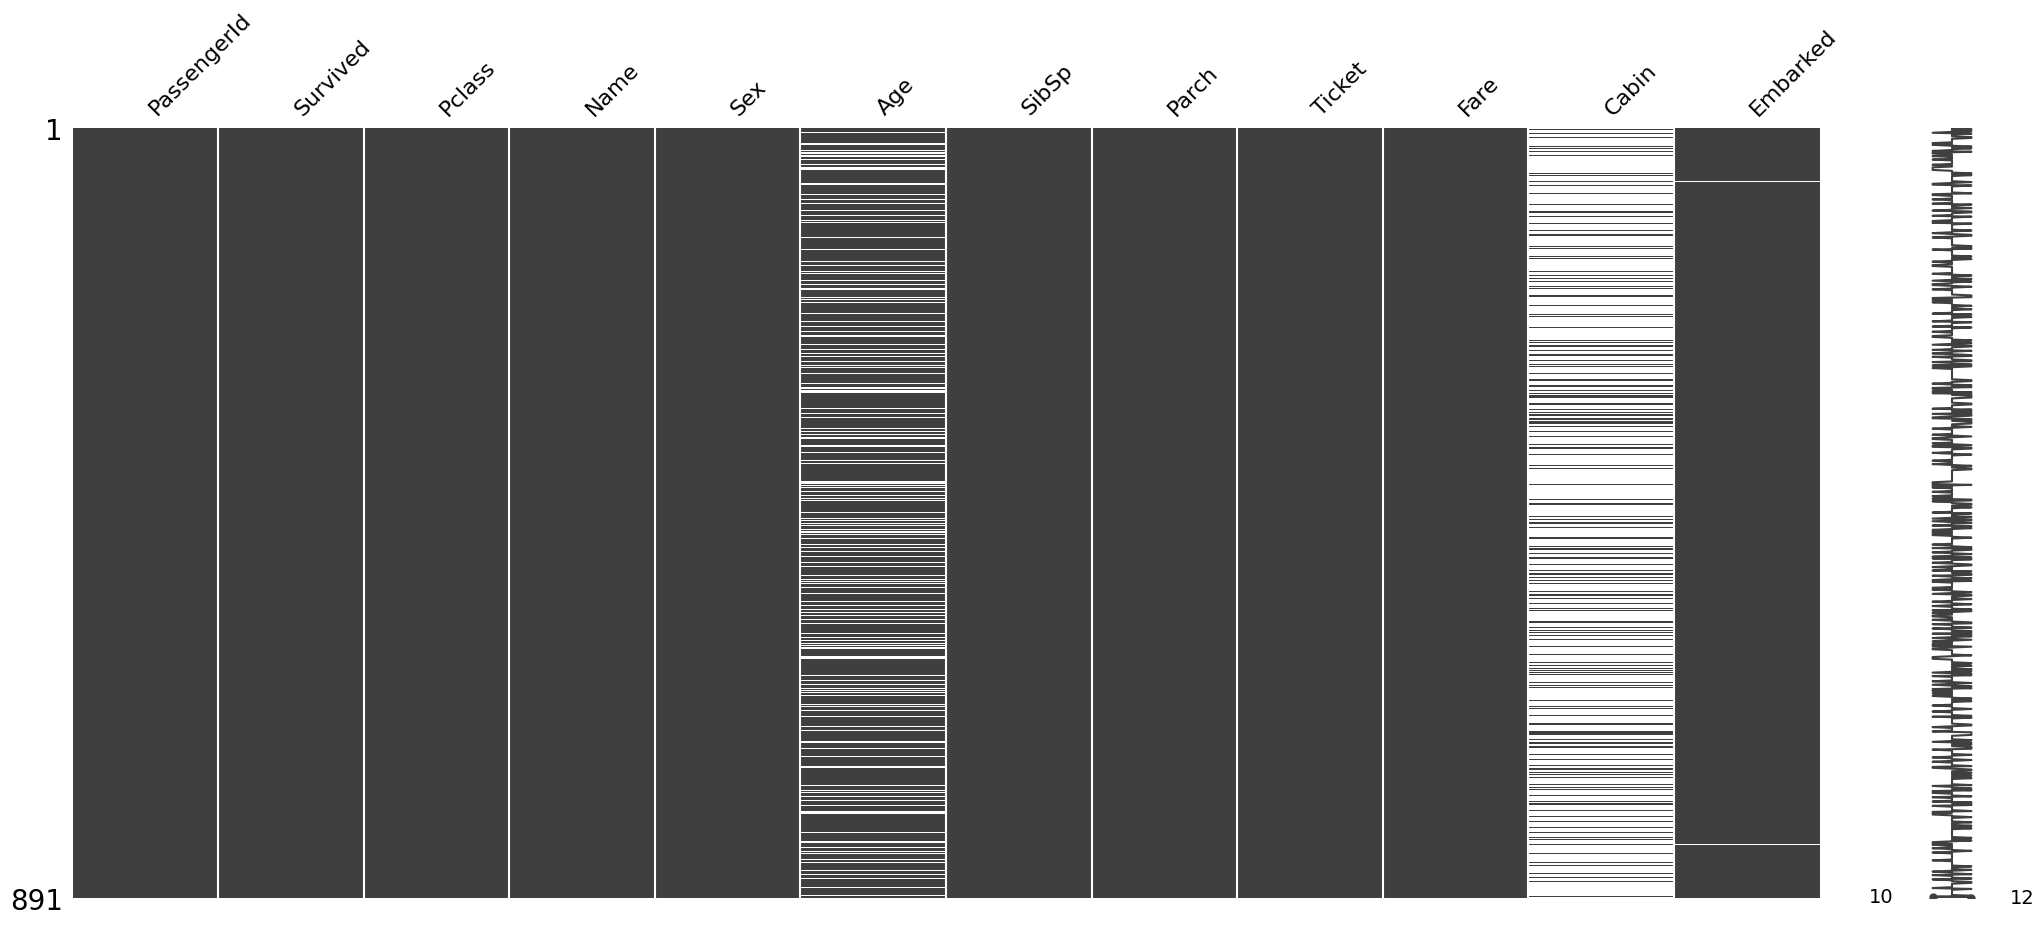

In [8]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

In [9]:
sub_df = df[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked", "SibSp", "Parch"]]

In [10]:
sub_df = sub_df.dropna()

In [11]:
sub_df.shape

(712, 8)

In [12]:
from feature_engine.selection import DropDuplicateFeatures, DropConstantFeatures

In [13]:
sel = DropConstantFeatures(tol=0.998, variables=None, missing_values='ignore')

In [14]:
sel.fit(df)
sel.features_to_drop_

[]

Il n'y a pas de valeurs constantes

In [15]:
transformer = DropDuplicateFeatures()

In [16]:
transformer.fit(df)

DropDuplicateFeatures()

In [17]:
transformer.features_to_drop_

set()

Il n'y pas de valeurs dupliquées

In [18]:
sub_df.to_csv("../data/interim/train.csv")

# Train/Test split

In [19]:
sub_df["Pclass"] = sub_df["Pclass"].astype("object")
X = sub_df[["Pclass", "Sex", "Age", "Fare", "Embarked", "SibSp", "Parch"]]
y = sub_df["Survived"]

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
RANDOM_STATE = 20230116
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=RANDOM_STATE)
train_valid_idx, test_idx = next(strat_split.split(X, y))

X_train = X.iloc[list(train_valid_idx),:]
y_train = y.iloc[list(train_valid_idx)]
X_test = X.iloc[list(test_idx), :]
y_test = y.iloc[list(test_idx)]

In [21]:
X_train.shape

(498, 7)

In [22]:
X_test.shape

(214, 7)

In [23]:
y_train.value_counts()

Survived
0    297
1    201
Name: count, dtype: int64

In [24]:
y_test.value_counts()

Survived
0    127
1     87
Name: count, dtype: int64

# Tranformation des données

## Lister les variablers catégorielles

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 394 to 243
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    498 non-null    object 
 1   Sex       498 non-null    object 
 2   Age       498 non-null    float64
 3   Fare      498 non-null    float64
 4   Embarked  498 non-null    object 
 5   SibSp     498 non-null    int64  
 6   Parch     498 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 31.1+ KB


In [26]:
categorical = list(X_train.select_dtypes(include='object').columns)

In [27]:
categorical

['Pclass', 'Sex', 'Embarked']

In [28]:
import numpy as np

## Liste de variables numériques et discrètes

In [29]:
numerical = X_train.select_dtypes(include=np.number).columns

In [30]:
numerical

Index(['Age', 'Fare', 'SibSp', 'Parch'], dtype='object')

In [31]:
discrete = []
for var in numerical:
    if len(X_train[var].unique()) < 10 :
        discrete.append(var)

In [32]:
discrete

['SibSp', 'Parch']

In [33]:
numerical = [var for var in numerical if var not in discrete]

In [34]:
numerical

['Age', 'Fare']

## Valeurs abberantes

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Exemple de données (remplacez ceci par votre propre DataFrame)
np.random.seed(0)

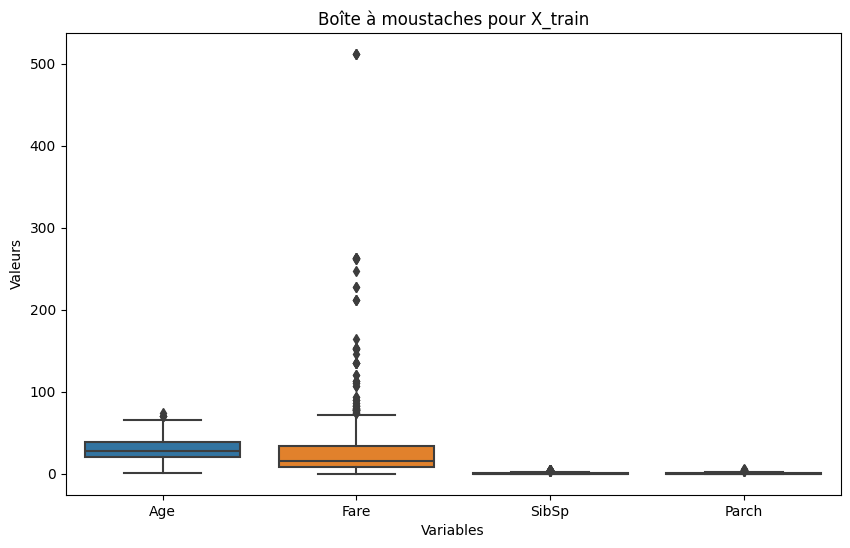

In [37]:
# Création de la boîte à moustaches
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train[numerical + discrete])
plt.title('Boîte à moustaches pour X_train')
plt.xlabel('Variables')
plt.ylabel('Valeurs')

plt.show()

## Transformation des données

In [38]:
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

In [39]:
from sklearn.preprocessing import RobustScaler

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
from sklearn.compose import ColumnTransformer

In [42]:
# Il faudra transformer Fare
# Il faudra imputer les valeurs manquantes de l'attribut Age

In [43]:
numerical

['Age', 'Fare']

In [44]:
discrete

['SibSp', 'Parch']

In [45]:
categorical

['Pclass', 'Sex', 'Embarked']

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

In [47]:
class SqrtTransformer(BaseEstimator, TransformerMixin):
    """Applique la transformation racine carrée aux variables d'entrée"""
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        """Rien à faire ici"""
        return self
    
    def transform(self, X, y=None):
        """Applique la transformation racine carrée aux variables d'entrée"""
        return np.sqrt(X)

In [48]:
simple_num_pipeline = Pipeline(
    [
    ('imputation_mediane', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('robust_scaler', RobustScaler())
    ]
)

In [49]:
sqrt_num_pipeline = Pipeline([
    ('imputation_mediane', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('sqrt_transformer', SqrtTransformer()),
    ('robust_scaler', RobustScaler())
]
)

In [50]:
from sklearn.preprocessing import FunctionTransformer

In [51]:
log_num_pipeline = Pipeline(
    [
        ('imputation_mediane', SimpleImputer(missing_values=np.nan, strategy='median')),
        ('log_transform', FunctionTransformer(np.log1p)), # ajouter 1 pour éviter de prendre le logarithme de 0
        ('robust_scaler', RobustScaler())
    ]
)

In [52]:
from sklearn.preprocessing import KBinsDiscretizer

bins_num_pipeline = Pipeline(
    [
        ('imputation_mediane', SimpleImputer(missing_values=np.nan, strategy='median')),
        ('kbins_discretizer', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform', subsample=None)),
        ('robust_scaler', RobustScaler())
        
    ]
)

In [53]:
steps_sqrt = [
    ("Age", simple_num_pipeline, ["Age"]),
    ("Fare", sqrt_num_pipeline, ["Fare"]),
    ("cat", OneHotEncoder(handle_unknown = 'ignore'), categorical+discrete),
]

In [54]:
steps_log = [
    ("Age", simple_num_pipeline, ["Age"]),
    ("Fare", log_num_pipeline, ["Fare"]),
    ("cat", OneHotEncoder(handle_unknown = 'ignore'), categorical+discrete),
]

In [55]:
steps_kbins = [
    ("Age", simple_num_pipeline, ["Age"]),
    ("Fare", bins_num_pipeline, ["Fare"]),
    ("cat", OneHotEncoder(handle_unknown = 'ignore'), categorical+discrete),
]

In [56]:
sqrt_preprocessing_pipeline = ColumnTransformer(steps_sqrt)

In [57]:
log_preprocessing_pipeline = ColumnTransformer(steps_log)

In [58]:
kbins_preprocessing_pipeline = ColumnTransformer(steps_kbins)

In [59]:
sqrt_preprocessing_pipeline.fit(X_train)

ColumnTransformer(transformers=[('Age',
                                 Pipeline(steps=[('imputation_mediane',
                                                  SimpleImputer(strategy='median')),
                                                 ('robust_scaler',
                                                  RobustScaler())]),
                                 ['Age']),
                                ('Fare',
                                 Pipeline(steps=[('imputation_mediane',
                                                  SimpleImputer(strategy='median')),
                                                 ('sqrt_transformer',
                                                  SqrtTransformer()),
                                                 ('robust_scaler',
                                                  RobustScaler())]),
                                 ['Fare']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Pclass', 'Sex', 'Embarked', 'SibSp',
                                  'Parch'])])

In [60]:
log_preprocessing_pipeline.fit(X_train)

ColumnTransformer(transformers=[('Age',
                                 Pipeline(steps=[('imputation_mediane',
                                                  SimpleImputer(strategy='median')),
                                                 ('robust_scaler',
                                                  RobustScaler())]),
                                 ['Age']),
                                ('Fare',
                                 Pipeline(steps=[('imputation_mediane',
                                                  SimpleImputer(strategy='median')),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                 ('robust_scaler',
                                                  RobustScaler())]),
                                 ['Fare']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Pclass', 'Sex', 'Embarked', 'SibSp',
                                  'Parch'])])

In [61]:
kbins_preprocessing_pipeline.fit(X_train)

ColumnTransformer(transformers=[('Age',
                                 Pipeline(steps=[('imputation_mediane',
                                                  SimpleImputer(strategy='median')),
                                                 ('robust_scaler',
                                                  RobustScaler())]),
                                 ['Age']),
                                ('Fare',
                                 Pipeline(steps=[('imputation_mediane',
                                                  SimpleImputer(strategy='median')),
                                                 ('kbins_discretizer',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=10,
                                                                   strategy='uniform',
                                                                   subsample=None)),
                                                 ('robust_scaler',
                                                  RobustScaler())]),
                                 ['Fare']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Pclass', 'Sex', 'Embarked', 'SibSp',
                                  'Parch'])])

In [62]:
from joblib import dump
dump(sqrt_preprocessing_pipeline, "../models/sqrt_preprocessing_pipeline.joblib")

['../models/sqrt_preprocessing_pipeline.joblib']

In [63]:
dump(log_preprocessing_pipeline, "../models/log_preprocessing.joblib")

['../models/log_preprocessing.joblib']

In [64]:
dump(kbins_preprocessing_pipeline, "../models/kbins_preprocessing_pipeline.joblib")

['../models/kbins_preprocessing_pipeline.joblib']

In [65]:
preprocessing_pipelines = {}

In [66]:
preprocessing_pipelines["sqrt"] = sqrt_preprocessing_pipeline

In [67]:
preprocessing_pipelines["log"] = log_preprocessing_pipeline

In [68]:
preprocessing_pipelines["kbins"] = kbins_preprocessing_pipeline

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def plot_tsne(X_train, y_train, perplexity=30, n_components=2, init='random', random_state=None):
    """
    Affiche une projection t-SNE de X_train colorée par y_train.

    :param X_train: Les données d'entrée (features).
    :param y_train: Les étiquettes correspondantes.
    :param perplexity: La perplexité pour t-SNE.
    :param n_components: Le nombre de dimensions pour la projection t-SNE.
    :param init: La méthode d'initialisation pour t-SNE.
    :param random_state: L'état aléatoire pour la reproductibilité.
    """
    tsne = TSNE(n_components=n_components, perplexity=perplexity, init=init, random_state=random_state)
    X_tsne = tsne.fit_transform(X_train)

    plt.figure(figsize=(10, 8))
    for cl in np.unique(y_train):
        indices = y_train == cl
        plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label=cl)
    
    plt.xlabel('t-SNE feature 1')
    plt.ylabel('t-SNE feature 2')
    plt.title('t-SNE projection de X_train')
    plt.legend()
    plt.show()

# Exemple d'utilisation
# plot_tsne(X_train, y_train)


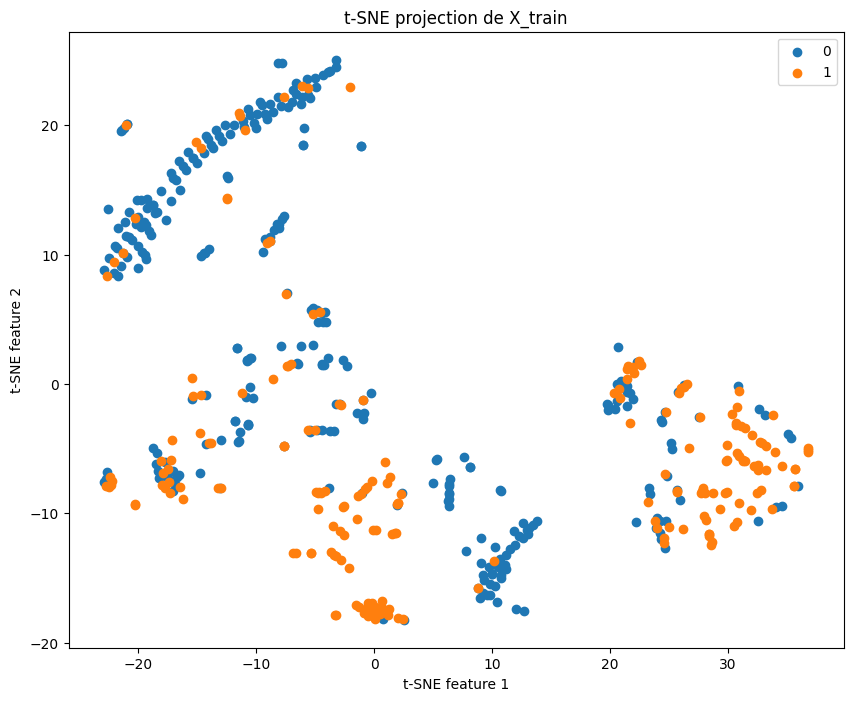

In [70]:
plot_tsne(sqrt_preprocessing_pipeline.transform(X_train), y_train)

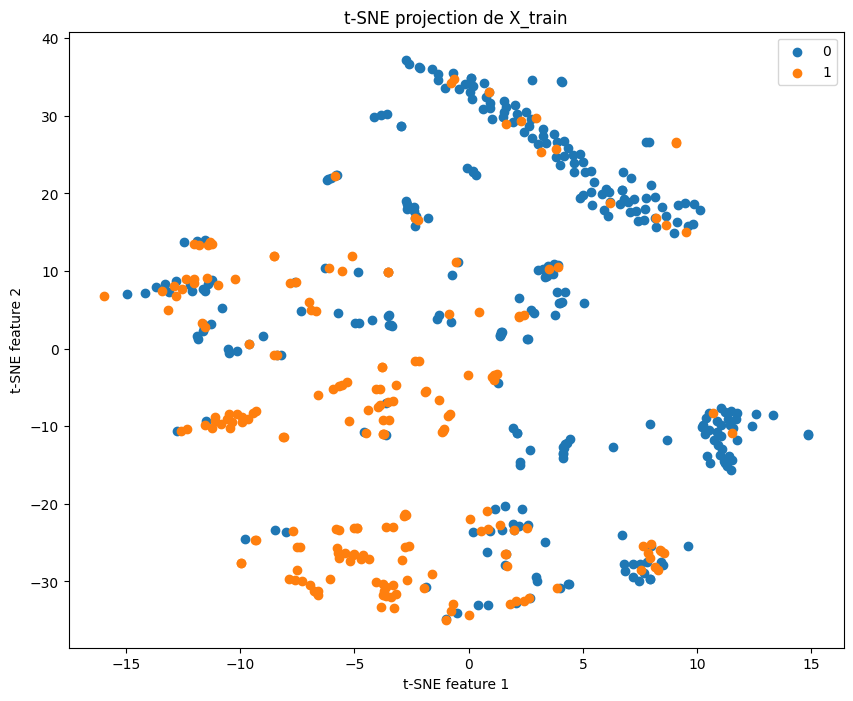

In [71]:
plot_tsne(log_preprocessing_pipeline.transform(X_train), y_train)

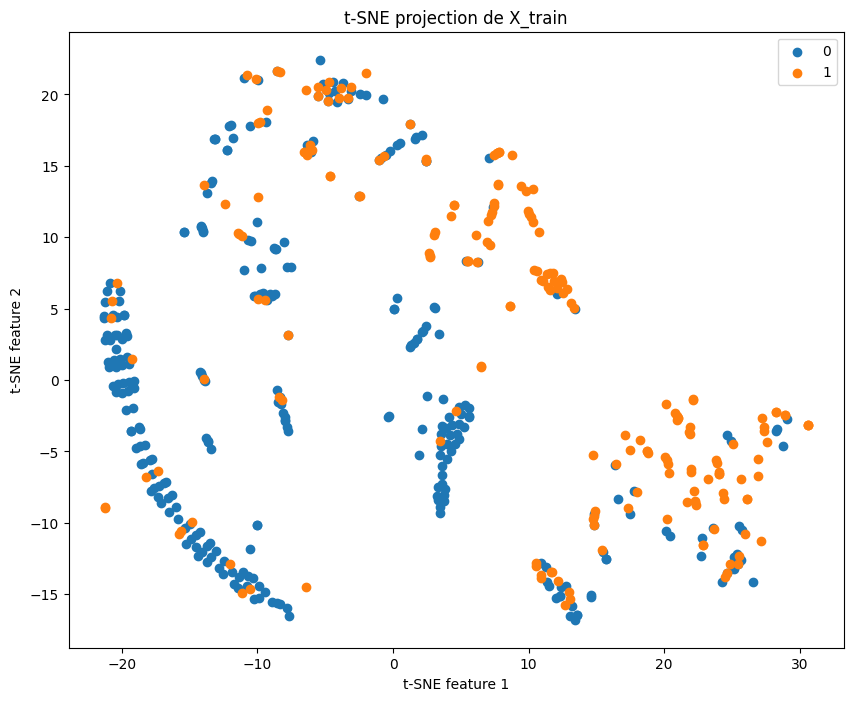

In [72]:
plot_tsne(kbins_preprocessing_pipeline.transform(X_train), y_train)

# Modélisation

In [73]:
from sklearn.metrics import classification_report
from imblearn.pipeline import make_pipeline

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [75]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [76]:
for ppk, preprocessed_pipeline in preprocessing_pipelines.items():
    for name, model_ in models.items():
        # Entraînement du modèle
        model = make_pipeline(preprocessed_pipeline, model_)
        model.fit(X_train, y_train)

        # Prédiction sur l'ensemble de test
        predictions = model.predict(X_test)

        # Évaluation du modèle
        print(f"Preprocessing : {ppk}")
        print(f"Model: {name}")
        print(classification_report(y_test, predictions))
        print("-" * 60)

Preprocessing : sqrt
Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       127
           1       0.79      0.74      0.76        87

    accuracy                           0.81       214
   macro avg       0.81      0.80      0.80       214
weighted avg       0.81      0.81      0.81       214

------------------------------------------------------------
Preprocessing : sqrt
Model: Decision Tree
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       127
           1       0.67      0.64      0.66        87

    accuracy                           0.73       214
   macro avg       0.72      0.72      0.72       214
weighted avg       0.73      0.73      0.73       214

------------------------------------------------------------
Preprocessing : sqrt
Model: Random Forest
              precision    recall  f1-score   support

           0       0.82      0.87    

In [77]:
import mlflow
from sklearn.metrics import classification_report

# Assurez-vous que MLflow est configuré correctement ici
# Par exemple, vous pouvez définir le URI du serveur MLflow
mlflow.set_tracking_uri('http://127.0.0.1:5000')
mlflow.set_experiment("titanic-experiment")

for ppk, preprocessed_pipeline in preprocessing_pipelines.items():
    for name, model_ in models.items():
        with mlflow.start_run():
            # Enregistrement des paramètres du modèle et du prétraitement
            mlflow.log_param("preprocessing", ppk)
            mlflow.log_param("model", name)

            # Création et entraînement du modèle
            model = make_pipeline(preprocessed_pipeline, model_)
            model.fit(X_train, y_train)

            # Prédiction sur l'ensemble de test
            predictions = model.predict(X_test)

            # Évaluation du modèle
            report = classification_report(y_test, predictions, output_dict=True)
            print(f"Preprocessing : {ppk}")
            print(f"Model: {name}")
            print(classification_report(y_test, predictions))
            print("-" * 60)

            # Enregistrement des métriques
            for metric_name, metric_value in report.items():
                if isinstance(metric_value, dict):
                    for sub_metric, sub_value in metric_value.items():
                        mlflow.log_metric(f"{metric_name}_{sub_metric}", sub_value)
                else:
                    mlflow.log_metric(metric_name, metric_value)

            # Enregistrement du modèle
            mlflow.sklearn.log_model(model, f"model_{ppk}_{name}")


Preprocessing : sqrt
Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       127
           1       0.79      0.74      0.76        87

    accuracy                           0.81       214
   macro avg       0.81      0.80      0.80       214
weighted avg       0.81      0.81      0.81       214

------------------------------------------------------------
Preprocessing : sqrt
Model: Decision Tree
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       127
           1       0.67      0.67      0.67        87

    accuracy                           0.73       214
   macro avg       0.72      0.72      0.72       214
weighted avg       0.73      0.73      0.73       214

------------------------------------------------------------


/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Preprocessing : sqrt
Model: Random Forest
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       127
           1       0.78      0.70      0.74        87

    accuracy                           0.80       214
   macro avg       0.80      0.78      0.79       214
weighted avg       0.80      0.80      0.80       214

------------------------------------------------------------


/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Preprocessing : sqrt
Model: Support Vector Machine
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       127
           1       0.95      0.67      0.78        87

    accuracy                           0.85       214
   macro avg       0.88      0.82      0.83       214
weighted avg       0.87      0.85      0.84       214

------------------------------------------------------------


/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Preprocessing : sqrt
Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       127
           1       0.81      0.67      0.73        87

    accuracy                           0.80       214
   macro avg       0.80      0.78      0.78       214
weighted avg       0.80      0.80      0.80       214

------------------------------------------------------------


/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Preprocessing : log
Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       127
           1       0.78      0.74      0.76        87

    accuracy                           0.81       214
   macro avg       0.80      0.80      0.80       214
weighted avg       0.81      0.81      0.81       214

------------------------------------------------------------


/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Preprocessing : log
Model: Decision Tree
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       127
           1       0.66      0.66      0.66        87

    accuracy                           0.72       214
   macro avg       0.71      0.71      0.71       214
weighted avg       0.72      0.72      0.72       214

------------------------------------------------------------


/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Preprocessing : log
Model: Random Forest
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       127
           1       0.81      0.71      0.76        87

    accuracy                           0.81       214
   macro avg       0.81      0.80      0.80       214
weighted avg       0.81      0.81      0.81       214

------------------------------------------------------------


/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Preprocessing : log
Model: Support Vector Machine
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       127
           1       0.93      0.66      0.77        87

    accuracy                           0.84       214
   macro avg       0.87      0.81      0.82       214
weighted avg       0.86      0.84      0.83       214

------------------------------------------------------------


/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Preprocessing : log
Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       127
           1       0.78      0.68      0.72        87

    accuracy                           0.79       214
   macro avg       0.79      0.77      0.78       214
weighted avg       0.79      0.79      0.79       214

------------------------------------------------------------


/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Preprocessing : kbins
Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       127
           1       0.80      0.74      0.77        87

    accuracy                           0.82       214
   macro avg       0.81      0.80      0.81       214
weighted avg       0.82      0.82      0.82       214

------------------------------------------------------------


/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Preprocessing : kbins
Model: Decision Tree
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       127
           1       0.72      0.70      0.71        87

    accuracy                           0.77       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214

------------------------------------------------------------


/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Preprocessing : kbins
Model: Random Forest
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       127
           1       0.78      0.66      0.71        87

    accuracy                           0.79       214
   macro avg       0.78      0.76      0.77       214
weighted avg       0.78      0.79      0.78       214

------------------------------------------------------------


/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Preprocessing : kbins
Model: Support Vector Machine
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       127
           1       0.93      0.66      0.77        87

    accuracy                           0.84       214
   macro avg       0.87      0.81      0.82       214
weighted avg       0.86      0.84      0.83       214

------------------------------------------------------------


/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Preprocessing : kbins
Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       127
           1       0.79      0.70      0.74        87

    accuracy                           0.80       214
   macro avg       0.80      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214

------------------------------------------------------------


/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/vanel/datascience_saintjean/env_st_jean/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
